# Execute the code below

In [11]:
import plotly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

SyntaxError: ignored

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [12]:
# Complete x, y and z in the script below:
fig = px.scatter_3d(x ='MAX_TEMPERATURE_C',
              y ='MIN_TEMPERATURE_C' ,
              z= 'SUNHOUR' ,
              data_frame=df_weather,
              labels = {'MAX_TEMPERATURE_C' : 'Max Temperature (C°)',
                        'MIN_TEMPERATURE_C' : 'Min Temperature (C°)',
                        'SUNHOUR' : 'Sunhours'},
              title = '3D Scatterplot of Weather Data',
              opacity = 0.7)

fig.show()


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y).

**Remember to save the result of your prediction in a new column 'predict'.**

In [15]:
# Your code here :
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model=LinearRegression()

model.fit(X_train, y_train)
y_pred= model.predict(X_test)

df_weather['predict'] = model.predict(X)

mse = metrics.mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
result_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_table)


Mean Squared Error: 7.889119732198382
     Actual  Predicted
193      27  24.700422
33        8   7.807741
15        8   4.635101
309      13  12.973185
57       20  17.577475
..      ...        ...
203      39  31.842130
82       13  13.061568
94       10  10.650056
192      26  27.326223
325      10   8.629599

[73 rows x 2 columns]


### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [16]:
# Your code here :
fig = px.scatter_3d(df_weather, x='predict', y='MIN_TEMPERATURE_C', z='SUNHOUR',
                    labels={'predict': 'Predicted MAX Temperature (°C)',
                            'MIN_TEMPERATURE_C': 'Min Temperature (°C)',
                            'SUNHOUR': 'Sunhours'},
                    title='3D Scatterplot of Predicted MAX Temperature, MIN Temperature, and Sunhours',
                    opacity=0.7)

fig.show()

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware :
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

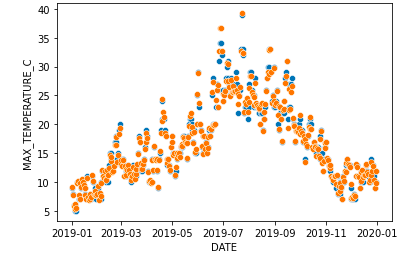

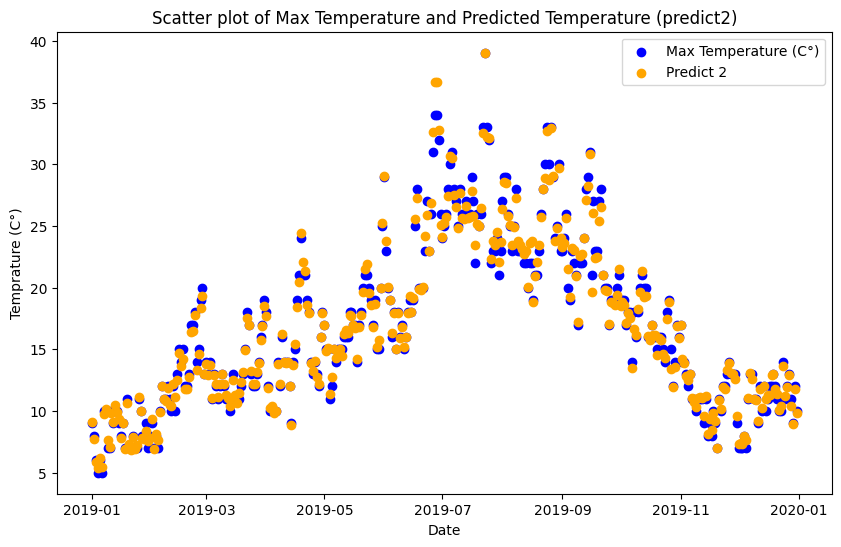

In [25]:
# Your code here :
# On convertit la date au format datetime
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
#On selectionne toutes les colonnes numériques comme features en exculuant la cible Max temperature
X = df_weather.select_dtypes(include='number').drop('MAX_TEMPERATURE_C', axis=1)

# Variable cible
y = df_weather['MAX_TEMPERATURE_C']

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#On sauvegarde la nouvelle prediction dans la colonne predict 2
df_weather['predict2'] = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], color='blue', label='Max Temperature (C°)')
plt.scatter(df_weather['DATE'],df_weather['predict2'], color='orange', label='Predict 2')
plt.xlabel('Date')
plt.ylabel('Temprature (C°)')
plt.title('Scatter plot of Max Temperature and Predicted Temperature (predict2)')
plt.legend()
plt.show()


You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [26]:
# Your code here :
model.fit(X, y)

coefficients = model.coef_

coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

print(coefficients_df)

max_coefficient_feature = coefficients_df.loc[coefficients_df['Coefficient'].idxmax(), 'Feature']
print(f"\nThe column with the largest coefficient is: {max_coefficient_feature}")

model.fit(X, y)

# Utiliser zip pour afficher les associations entre les variables et les coefficients
for feature, coefficient in zip(X.columns, model.coef_):
    print(f"{feature}: {coefficient}")


                   Feature   Coefficient
0        MIN_TEMPERATURE_C  3.096517e-02
1        WINDSPEED_MAX_KMH -2.435580e-03
2    TEMPERATURE_MORNING_C -5.958810e-02
3       TEMPERATURE_NOON_C  1.310651e-01
4    TEMPERATURE_EVENING_C  1.301109e-01
5      PRECIP_TOTAL_DAY_MM  3.639210e-03
6     HUMIDITY_MAX_PERCENT -2.712053e-03
7        VISIBILITY_AVG_KM  6.623770e-03
8          PRESSURE_MAX_MB -4.338928e-04
9   CLOUDCOVER_AVG_PERCENT -3.947925e-03
10         HEATINDEX_MAX_C  4.092417e-01
11          DEWPOINT_MAX_C -2.805168e-02
12          WINDTEMP_MAX_C  3.418279e-02
13    WEATHER_CODE_MORNING  3.291790e-04
14       WEATHER_CODE_NOON  9.376365e-05
15    WEATHER_CODE_EVENING -1.692620e-04
16           TOTAL_SNOW_MM  1.387779e-17
17                UV_INDEX -2.686825e-02
18                 SUNHOUR -2.405876e-02
19                   MONTH  7.539464e-03
20                     DAY -4.767719e-04
21                 predict  1.524204e-02
22                predict2  2.978310e-01

The column with